In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Necklace splitting and Borsuk-Ulam
See youtube video for detailed explanation. This notebook looks at a few specific issues, namely:
1. what happens to the requirement that some division of the 3 intervals (a^2, b^2, c^2) into 2 must have equal number of gems?
2. what is the function that maps from 3D to 2D?
3. how does the visualization look like?


- https://www.youtube.com/watch?v=yuVqxCSsE7c
- http://math.uchicago.edu/~may/REU2017/REUPapers/Simcic.pdf
- https://m.tau.ac.il/~nogaa/PDFS/Publications/The%20Borsuk-Ulam%20Theorem%20and%20bisection%20of%20necklaces.pdf

hilarious side note: on this deep dive, I learned that apparently andy warhol drew a dick for a little art piece that is currently in the only (man-made) museum on the moon.
- https://www.youtube.com/watch?v=csInNn6pfT4
- https://en.wikipedia.org/wiki/Moon_Museum

What originally confused me is that I felt there was an additional constraint missing: that the division of intervals had to be equal, which means, given that there are only 2 cuts, that one of the lengths have to be 0.5, otherwise it's impossible for the two thieves to have the same number of gems of each type since they do not have the same number of gems to start with. This is the bisection requirement (req1).

# The function
The function maps a point on the 3D unit sphere, where each coordinate represents the number of beads in that segment of the necklace, onto the 2D plane, where each coordinate represents the number of gems of type i each thief receives.

Actaually, each thief would have it's own function, f1 and f2, and to satisfy the requirements of the problem, f1=f2 for the specific division of necklaces, i.e., f1(x,y,z) = f2(-x,-y,-z).

Note that this is the specific instantiation of the problem with 2 thieves and 2 types of gems, which, invoking the B-U theorem, tells us that you only need to make 2 cuts. Hence, 3 segments of necklace pieces -> 2 gem types.

From the youtube video, we can take as given that there IS such a function that maps from 3D to 2D, which allows the invocation of B-U.

Up to this point, we are only guaranteed a solution for 2 cuts with any configuration of necklaces, but we don't actually know what that division should look like for a given necklace. Stepping through, for any given necklace configuration, only a subset of points on that sphere gives valid solutions.

So we are looking for the cut (the antipodes on the sphere), because the function is then specified by the necklace configuration. 

So we have to construct an intermediate (programatic) function: the one that takes a given necklace and a given cutting strategy, returns the number of gems of each type each thief receives. We also need a helper function that returns (simulates) a necklace of 1) a given length and 2) a given number of jewels (fixed at 2 for now).

I see now: req1 (bisection) should first limit the subset of points on the sphere, and the solution has to come from one of those points. Another problem arises: how to actually find the cut programmatically? Gradient descent over the function mapping, where the loss function is simply the difference between the outputs?

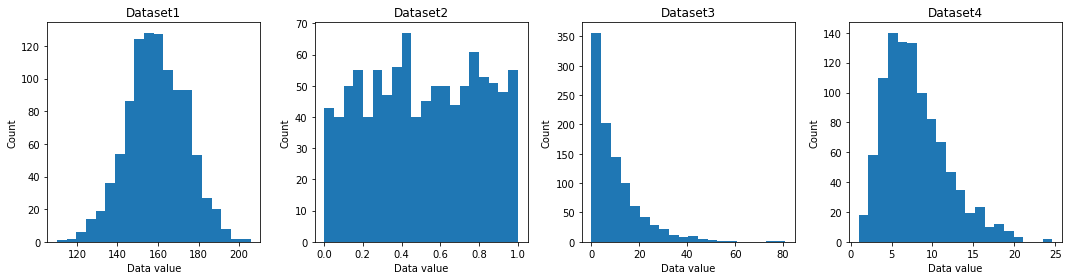

In [22]:
n = 1000
x = np.array([np.random.normal(loc=160, scale=15, size=(n,)),
              np.random.uniform(size=n),
              np.random.exponential(scale=10., size=n),
              np.random.chisquare(df=8,size=n)])

plt.figure(figsize=(15,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(x[i,:], 20)
    plt.xlabel('Data value')
    plt.ylabel('Count')
    plt.title('Dataset%i'%(i+1))

plt.tight_layout()
import pandas as pd
df = pd.DataFrame(x.T, columns=['Dataset 1','Dataset 2','Dataset 3','Dataset 4'])
#df.to_csv('/Users/rdgao/Dropbox/COGS9_F18/Assignments/A4/datasets.csv')